<h1 align="center"><font size = 8>Machine Learning | 2024 </font></h1>
<br>
<h2 align="center"><font size = 6  color="darkblue"> Logistic Regression </font></h2>
<h3 align="center">Abdulrahman Nourzad</h3>
<h4 align="center">Master's in Computer Software Engineering & Post DBA in Business Intelligence</h4>
<br>
<br>
<br>

## Project 4: predicting bank customer churn with logistic regression algorithm

<div class="alert alert-info" role="alert">
  <h1 class="alert-heading">Links:</h1>
  <a href="https://www.linkedin.com/in/abdulrahman-nourzad-9a427942/">LinkedIn</a><br>
  <a href="https://github.com/abdulrahmannourzad/Logistic_Regression_Nourzad_HW2">GitHub Repository</a><br>
  <a href="https://www.kaggle.com/code/abdulrahmannourzad/notebook-logistic-regression-hw2">Kaggle</a><br>
</div>

# Step 1: Introduction of problem definition & business goal

### 🟣 A: Description
- <strong>Logistic Regression</strong> is a supervised machine learning algorithm mainly used for binary classification where we use a logistic function, also known as a sigmoid function that takes input as independent variables and produces a probability value between 0 and 1. For example, we have two classes Class 0 and Class 1 if the value of the logistic function for an input is greater than 0.5 (threshold value) then it belongs to Class 1 it belongs to Class 0. It’s referred to as regression because it is the extension of linear regression but is mainly used for classification problems. The difference between linear regression and logistic regression is that linear regression output is the continuous value that can be anything while logistic regression predicts the probability that an instance belongs to a given class or not.

- <strong>Bank customer churn </strong>has become a big issue in many banks because it costs a lot more to acquire a new customer than retaining existing ones. With the use of a customer churn prediction model possible churners in a bank can be identified, and as a result the bank can take some action to prevent them from leaving.
- Please look at the image below which shows well the concept of churn:

<img src="images/churn_1.png">

### 🟣 B: About Dataset
The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The object of the dataset is to predict which customers are likely to churn, based on the input features provided. The dataset can be used for classification tasks using various machine learning algorithms, such as logistic regression. By predicting customer churn, banks can take appropriate measures to retain their customers and reduce customer turnover.

#### Shape of the Bank Customer Churn dataset:
The bank customer churn dataset involves 12 columns and 10000 records.

This dataset includes the following columns:

1. customer_id: A unique identifier for each customer

2. credit_score: A numerical value representing the customer's credit score

3. country: The country where the customer resides (France, Spain, Germany)

4. gender: The customer's gender (Male or Female)

5. age: The customer's age

6. tenure: The number of years the customer has been with the bank

7. balance: The customer's account balance

8. products_number: The number of bank products the customer uses (e.g., savings account, credit card)

9. credit_card: Whether the customer has a credit card (1 = yes, 0 = no)

10. active_member: Whether the customer is an active member (1 = yes, 0 = no)

11. estimated_salary: The estimated salary of the customer

12. churn: Whether the customer has churned (1 = yes, 0 = no)

### 🟣 C: Objective
- Conducting exploratory analysis to gain insight into the primary factors affecting customer churn.
- Build classification model with Logistic Regression to predict bank customer churn.
- fine-tune the hyperparameters & evaluation metrics of model.

# Step 2: Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

# Step 3: Read Data & Overview

In [2]:
data_churn = pd.read_csv("Bank Customer Churn Prediction.csv")

In [3]:
data_churn.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
row = data_churn.shape[0]
column = data_churn.shape[1]
results = pd.DataFrame([[row], [column]], columns=['Shape of data'], index=['Rows', 'Columns'])
results

,Shape of data
Rows,10000
Columns,12


In [5]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
#Checking basic statistical data by feature

data_churn.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
credit_score,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
country,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
products_number,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
credit_card,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
active_member,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0


In [7]:
dfSummary(data_churn)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,customer_id[int64],Mean (sd) : 15690940.6 (71936.2)min < med < max:15565701.0 < 15690738.0 < 15815690.0IQR (CV) : 124705.5 (218.1),"10,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3YvU/bQBjH8ecSCJeX2spLw+alI1IHS1mydOvYP7ZrtyKB1JmhSycWhGQFR3FBMWk6sULOR0h/1fezwuM7yd87I9x2uzXgX9c69AaAXRwdegP74pzrmlkn4hHr7XZ7/1r7QZz/MlTnXHc8Hn9JkmTY9BnL5XLhnPtKrLuLvByevRj2Guor3GotM/vTYC4ZDAbT+Xy+TNP0IXS4LEt/fn4+LYpi4pxbNli/6b5jZ80ivgSR78uPRqPPaZr2mwy/dDG8GGrE5qM2vtlsjquq+jAYDH61Wq06ZLaua7/ZbM5OTk6+T6fT36FrV1V1XNf1xyzL2u12Oyj0mH3HzD65u7tbOee+mVnoAY16X3VdezM7m81mPyaTSdDhLsvSX1xcDIui6JhZeKgxn9CYjZuZXV9fD6+urt7nef7z9PR00WC29/j42A5d18xsvV4fee97eZ4/NFw7Zt+NZs3Mbm5u3l1eXn7KsmwSesBe6X31vPd1k8vBzLrP/fClG7WTJMlwPp/fh35CYze+WCy6Zmb9fv8hdP5pNlbM2m89+zQfecCi39e+7PQ3apqmB4sF4Q55uPeF/6NCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCwtEuv1SWpQ998Gq18mZmVVX529vb3lvOq66tuu/Y+V36+gu06z5/wVSueAAAAABJRU5ErkJggg=="">",0(0.0%)
2,credit_score[int64],Mean (sd) : 650.5 (96.7)min < med < max:350.0 < 652.0 < 850.0IQR (CV) : 134.0 (6.7),460 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkklEQVR4nO3cMY7aQBSA4TdhQQYkWwgJOi4QaQtKDpHD5ggpKFJzAzoEsoxw1sIYb5EUG2nDxp6ZZZ75v3oNU/zCa+vNmLquBQjdl3svAPgfT/deAP5mjBmKyMDiI851Xb+4Wk8oCDUgxpjhdDr9FsfxpO1nHI/H1BjzvWuxEmpYBnEcT1ar1UuSJEXTi7Msi9br9eRwOAxEhFBxm8XtO75er/0kSdLZbPar5dcPW14XNEJ1zOb2XZZlVFXV16IofohI21A7iVDda3373m63k81mM7pcLj1fi9OKUD1JkqRoevtO07STt20XeI8KFQgVKhAqVCBUqECoUIFQoQKhQgVChQq88O+Yqqr6IhIbY9pcHuyIIKF2SJ7n/bIsnxeLRa/X6zWevgp5RJBQO+R8Pj9FUTRaLpfFfD5Pm1wb+oggof6D7aie6/U0MR6PG88Z/BHsrAGhvoNRvfAQ6vsY1QsMod7AqF44eI8KFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKjQ2aEUy5Ob7z5Teg+W21hEPG5l6WSotic3P+JMqe02FhG/W1k6GapYntz8iDOlNttYRPxvZelqqCLSbp5U5LFnSi22sYh43MrCwxRUIFSoQKhQgVChAqFCBUKFCoQKFTr9HhWfy+dJgoQKJ3yfJEiocML3SYKECqd8nSTIwxRUIFSoQKhQIej/UTWf+gy3gg2VU5/xVrChCqc+442QQxURTn3GbzxMQQVChQqEChUIFSoQKlTw+tTPsTpwxVuoHKsDl3z+onKsDpzx/sKfY3XgAg9TUOHDX1QmmBCCm6G6mGDa7/c/2yzsdDpFIiJ5nke73W70Wdfe87u1rtv2+izLoo/+5hUeHIwMNeBfZAAAAABJRU5ErkJggg=="">",0(0.0%)
3,country[object],1. France2. Germany3. Spain,"5,014 (50.1%)2,509 (25.1%)2,477 (24.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmElEQVR4nO3b3YnbUBSF0aMghsyLhDG4GBeRYlOEujHG9yEzzIvykAbmj60rZa0KDubDRsJ7WNe1IOHH1gfw/xiq6rmqnrY+ZIfe1nV92fqIPRnP5/OvaZpOWx+yN621+zAMvwX3fuM0Tafr9foyz/Pr1sfsxePx+Lksy+l2uz1Vldjeaayqmuf59XK5/Nn6mJ153vqAvfGAQIzYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI2Yserf/7O2PmRPfF6fM7bW7suynMr/sz6ktXavqret79gTG4TPs0H4oMGUj5Tev9l8exxI1+sqC6Zj6XZdZcF0PL2vqzwhH4iXusSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiI6XZd1eNNfE3X6yoLpmOxQSDGuooYDwjE9Pwz6if0YLqd8pnxHU+XUz4zvmPqecrX3asYvsYDAjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZiupzy9XYP36PbKZ8Z3/HYIBBjykfMX0q8o0qM0LSXAAAAAElFTkSuQmCC"">",0(0.0%)
4,gender[object],1. Male2. Female,"5,457 (54.6%)4,543 (45.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa9CETNRBJy1YM/nJuPes4GMuhgQ/V0oxQMGZ2d3Mbr0PuZhXKeXR+4iz8eM4foQQht6HXEnOeXXOfRLcXz6EMMzz/IgxPnsfcwXbtr2nlIZlWW5mRmy/eDOzGONzmqav3sdcyL33AWf01vsA/B/EBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIeLOfD/56H3IVPMs6

### Results:
- count of columns: 12
- count of rows:  10000
- duplicates: No
- The dataset does not include any null or missing values so there won't be any need for data wrangling (dealing with missing values).
- The data type of  country and gender variables are categorical, therefore we first convert them to number using the on-hot encoding technique.

# Step 4: Data Preprocessing (Part 1)

### 🟣 A: Remove unnecessary and irrelevant columns

In [8]:
data_churn.drop(['customer_id'], axis=1, inplace=True)
data_churn

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 🟣 B: Check & Convert the data types if necessary

In [9]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#### Result:
- No need to convert the data type and It 's OK.
- It is better to specify that the data type of gender and country columns is categorical

In [10]:
# Convert data type of gender and country variables from object to category 
data_churn["gender"] = data_churn["gender"].astype('category')
data_churn["country"] = data_churn["country"].astype('category')
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   credit_score      10000 non-null  int64   
 1   country           10000 non-null  category
 2   gender            10000 non-null  category
 3   age               10000 non-null  int64   
 4   tenure            10000 non-null  int64   
 5   balance           10000 non-null  float64 
 6   products_number   10000 non-null  int64   
 7   credit_card       10000 non-null  int64   
 8   active_member     10000 non-null  int64   
 9   estimated_salary  10000 non-null  float64 
 10  churn             10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


- Result:  **It's ok!**

### 🟣 C: Check & Remove duplicate records

In [11]:
if data_churn.duplicated().sum() == 0 :
    print("Result: No duplicate values!")
else :
    print("Result: Count of duplicate values befor dropping: ", data_churn.duplicated().sum())
    data_churn = data_churn.drop_duplicates() #remove the duplicate values 
    print("Result: Count of duplicate values after dropping: ", data_churn.duplicated().sum())

Result: No duplicate values!


### 🟣 D: Handling outliers

**boxplot:**

<img src="images/box-plot.png" width=400 height=500 align="left"> <img src="images/box-plot-construction.png" width=500 height=500>

**Outlier Function: function for detect outliers in data, base on IQR criterion**

In [12]:
def outlier_func(data):
    outlier = []
    q3, q1 = np.percentile(data , [75, 25])
    iqr = q3 - q1
    for i in data:
        if (i > (q3 + 1.5 * iqr) or i < (q1 - 1.5 * iqr)):
            outlier.append(True)
        else:
            outlier.append(False)
    return outlier 

In [13]:
#column_names = list(data_churn.columns)
# We did not include the two gender and country columns in the list of columns, because they are categorical data type!
selected_column_names = ['credit_score','age','tenure','balance','products_number','credit_card',
                         'active_member', 'estimated_salary','churn']
df = pd.DataFrame()
for name in selected_column_names:
    df[name] = outlier_func(data_churn[name])
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,True
9998,False,False,False,False,False,False,False,False,True


In [14]:
#Objective: Find the sum of outliers in each record
data_rowsum = df.sum(axis = 1)
list(data_rowsum[data_rowsum >= 3].index) #The index list of records containing outliers greater than 3

[7, 5235]

#### Result: 2 records recognized as outlier data

In [15]:
#Show outliers data
data_churn.loc[[7, 5235], :]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
5235,645,France,Female,68,9,0.00,4,1,1,176353.87,1


In [16]:
#remove outliers
n_outlier_feature = 3 
for j in range(len(data_churn)):
    if data_rowsum[j] > n_outlier_feature :
        data_churn = data_churn.drop(j)

In [17]:
data_churn.shape

(10000, 11)

#### Results: 
#### No records were removed as outliers!
- Because we decided that the information of these two outliers is useful for churn analysis!
- On the other hand, both records had a churn value of 1.

### 🟣 E: Handling missing values (Keep/Drop/Fill with mean ,median or mode/Imputation?)

#### How much data is missing?

In [18]:
data_churn.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

#### Result: we don't have any missing values!

# Step 5: Visualization & Analysis

### 🟣 A: Show data balancing for classification (target variable: churn)

,Count,Count%
0,7963,79.63
1,2037,20.37


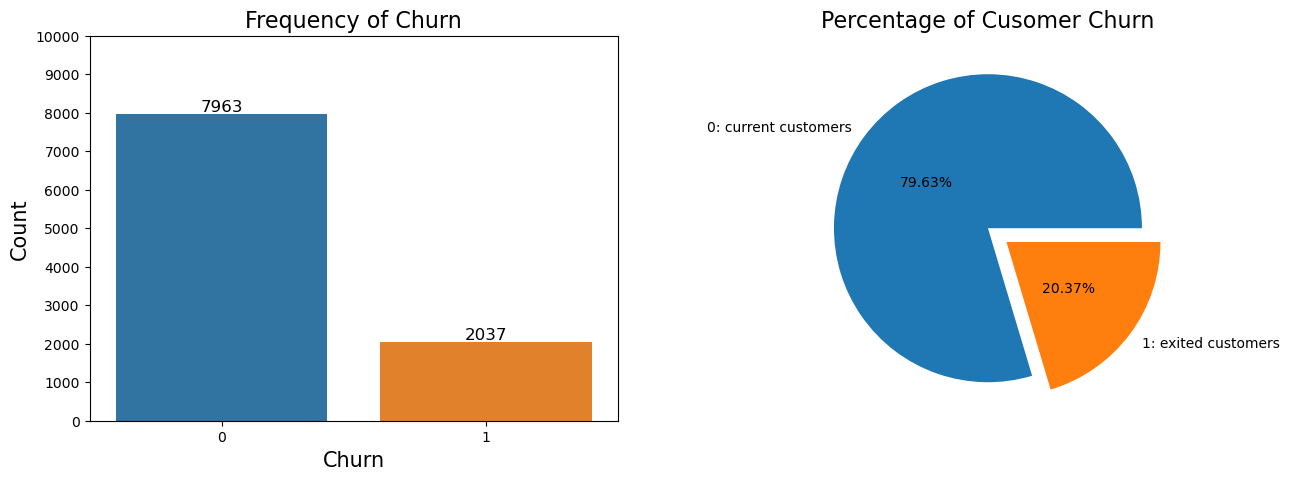

In [19]:
# color palettes
color = sns.color_palette()

# find the the insight the churn columns and visualization using the countplot for seaborn and pie plot.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x = data_churn["churn"],palette = color)
plt.yticks(np.arange(0, 10001, step=1000))

# Adding a title and labels to the plot
plt.title('Frequency of Churn', fontsize = 16 )
plt.xlabel('Churn', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Adding annotations to the bars
for i in range(len(data_churn["churn"].value_counts())):
    count = data_churn["churn"].value_counts()[i]
    label = count
    plt.annotate(label, (i, count), ha ='center', va ='bottom', fontsize=12)

plt.subplot(1,2,2)
plt.pie(data_churn["churn"].value_counts(), explode=[0.0,0.15], labels = ["0: current customers","1: exited customers"],
        colors = color, autopct = "%.02f%%", pctdistance = 0.5, labeldistance = 1.1)
# Adding a title to the plot
plt.title('Percentage of Cusomer Churn', fontsize = 16)

data_balancing = pd.DataFrame()
data_balancing["Count"] = data_churn["churn"].value_counts()
data_balancing["Count%"] = data_churn["churn"].value_counts()/data_churn.shape[0]*100
data_balancing

### Observation:
- Insight of the churn column: according to data actual churned customer are 2037 that means 20.37% of the customers have left.

### 🟣 B: Show & Find the insight of gender based on churn

In [20]:
count_gender = pd.DataFrame()
count_gender["Count"] = data_churn["gender"].value_counts()
count_gender["Count%"] = data_churn["gender"].value_counts()/data_churn.shape[0]*100
count_gender

,Count,Count%
Male,5457,54.57
Female,4543,45.43


In [21]:
count_gender_by_churn = pd.DataFrame()
count_gender_by_churn["Count"] = data_churn.gender.groupby(data_churn.churn).value_counts()
count_gender_by_churn["Count%"] = data_churn.gender.groupby(data_churn.churn).value_counts()/data_churn.shape[0]*100
count_gender_by_churn.sort_values(by = "gender")

,,Count,Count%
churn,gender,,
0,Female,3404,34.04
1,Female,1139,11.39
0,Male,4559,45.59
1,Male,898,8.98


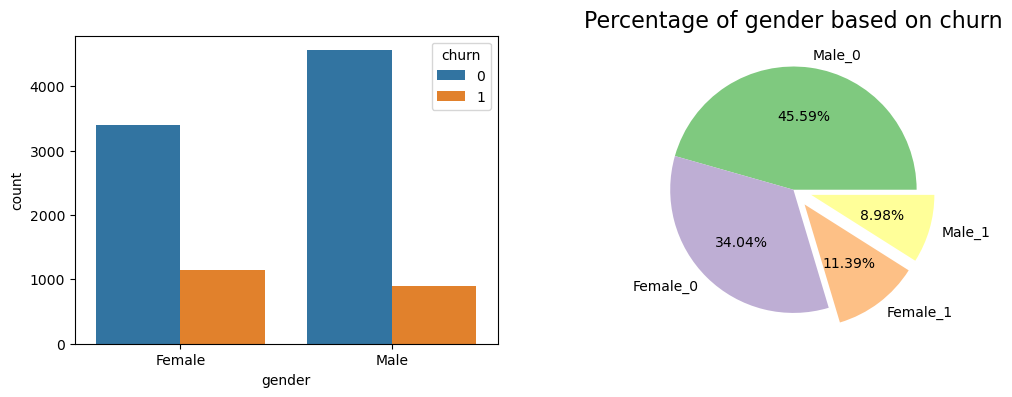

In [22]:
# color palettes
color_1 = sns.color_palette("Accent",10)

label = ["Male_0","Female_0","Female_1","Male_1"]
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data = data_churn, x="gender", hue="churn", palette=color)

plt.subplot(1,2,2)
# Adding a title to the plot
plt.title('Percentage of gender based on churn', fontsize = 16)
plt.pie(data_churn.gender.groupby(data_churn.churn).value_counts(), explode=[0.0,0.0,0.15,0.15],
        labels = label, colors = color_1, autopct="%0.2f%%")
plt.show()

### Obsarvation:
- Insight of the Gender column: mostly female customers are churned around 11.4% and male are churned around 9%.
- In total, 20.37% of male and female customers left.

### 🟣 C: Show & Find the insight of country based on churn

In [23]:
count_country = pd.DataFrame()
count_country["Count"] = data_churn["country"].value_counts()
count_country["Count%"] = data_churn["country"].value_counts()/data_churn.shape[0]*100
count_country

,Count,Count%
France,5014,50.14
Germany,2509,25.09
Spain,2477,24.77


In [24]:
count_country_by_churn = pd.DataFrame()
count_country_by_churn["Count"] = data_churn.country.groupby(data_churn.churn).value_counts()
count_country_by_churn["Count%"] = data_churn.country.groupby(data_churn.churn).value_counts()/data_churn.shape[0]*100
count_country_by_churn

Count  Count%
churn country               
0     France    4204   42.04
      Spain     2064   20.64
      Germany   1695   16.95
1     Germany    814    8.14
      France     810    8.10
      Spain      413    4.13

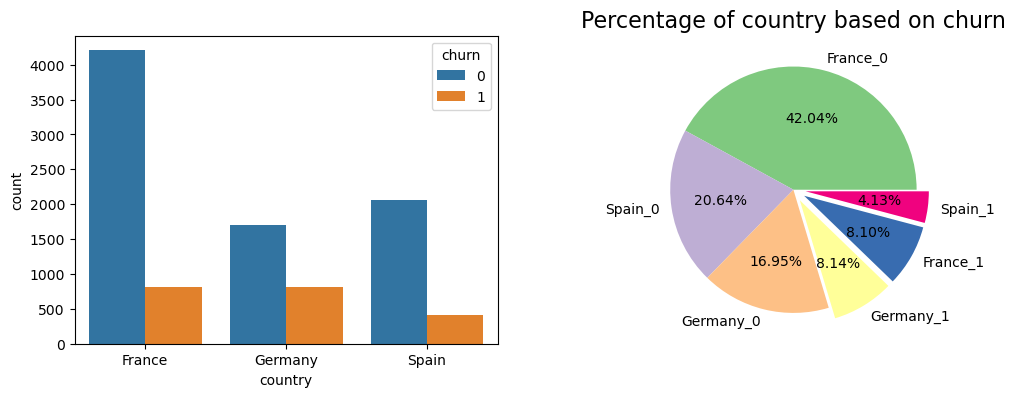

In [25]:
# color palettes
color_1 = sns.color_palette("Accent",10)

label = ["France_0","Spain_0","Germany_0","Germany_1","France_1","Spain_1"]
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data = data_churn, x="country", hue="churn", palette=color)

plt.subplot(1,2,2)
# Adding a title to the plot
plt.title('Percentage of country based on churn', fontsize = 16)
plt.pie(data_churn.country.groupby(data_churn.churn).value_counts(), explode=[0.0,0.0,0.0,0.1,0.1,0.1],
        labels = label, colors = color_1, autopct="%0.2f%%")
plt.show()

### Observation:
Insights of the country column is as follow:  
- mostly customer are churned from Germany 8.14% and France 8.1% and Spain 4.13%.
- But the following points are very important for each country:
    - About 32% of customers from Germany left (814 of 2509)!
    - About 17% of customers from Spain left (413 of 2477)!
    - About 16% of customers from France left (810 of 5014)!
    - In total, 20.37% of these customers left.

### 🟣 D: Show & Find the insights of products_number, credit_card and active_member based on churn

In [26]:
count_products_number_by_churn = pd.DataFrame()
cpnc = count_products_number_by_churn.copy()
cpnc["Count"] = data_churn.products_number.groupby(data_churn.churn).value_counts()
cpnc["Count%"] = data_churn.products_number.groupby(data_churn.churn).value_counts()/data_churn.shape[0]*100
cpnc

Count  Count%
churn products_number               
0     2                 4242   42.42
      1                 3675   36.75
      3                   46    0.46
1     1                 1409   14.09
      2                  348    3.48
      3                  220    2.20
      4                   60    0.60

In [27]:
count_credit_card_by_churn = pd.DataFrame()
cccc = count_credit_card_by_churn.copy()
cccc["Count"] = data_churn.credit_card.groupby(data_churn.churn).value_counts()
cccc["Count%"] = data_churn.credit_card.groupby(data_churn.churn).value_counts()/data_churn.shape[0]*100
cccc

Count  Count%
churn credit_card               
0     1             5631   56.31
      0             2332   23.32
1     1             1424   14.24
      0              613    6.13

In [28]:
count_active_member_by_churn = pd.DataFrame()
camc = count_active_member_by_churn.copy()
camc["Count"] = data_churn.active_member.groupby(data_churn.churn).value_counts()
camc["Count%"] = data_churn.active_member.groupby(data_churn.churn).value_counts()/data_churn.shape[0]*100
camc

Count  Count%
churn active_member               
0     1               4416   44.16
      0               3547   35.47
1     0               1302   13.02
      1                735    7.35

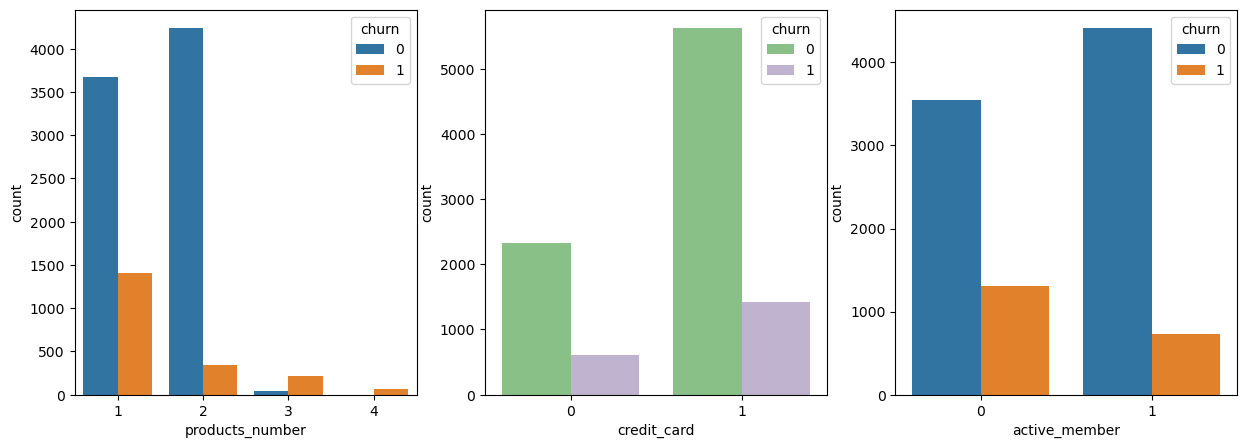

In [29]:
#Draw plots
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(data=data_churn, x="products_number", hue="churn", palette=color)
plt.subplot(1,3,2)
sns.countplot(data=data_churn, x="credit_card", hue="churn", palette=color_1)
plt.subplot(1,3,3)
sns.countplot(data=data_churn, x="active_member", hue="churn", palette=color)
plt.show()

### Observation:
- Insight of the products_number column: most of the 1 products_number customers are churned around 14%.
    - It's also have greater chances of churn.
- Insight of the credit_card column: most of the 1 credit_card customers are churned around 14%.
    - Customers who have a credit card, so they have a higher chance of churn!
- Insight of the active_member column: mostly 0 active_member are churned around 13%.
    - Inactive customers also have greater chances of churn.

### 🟣 E: Show & Find the insights of age based on churn

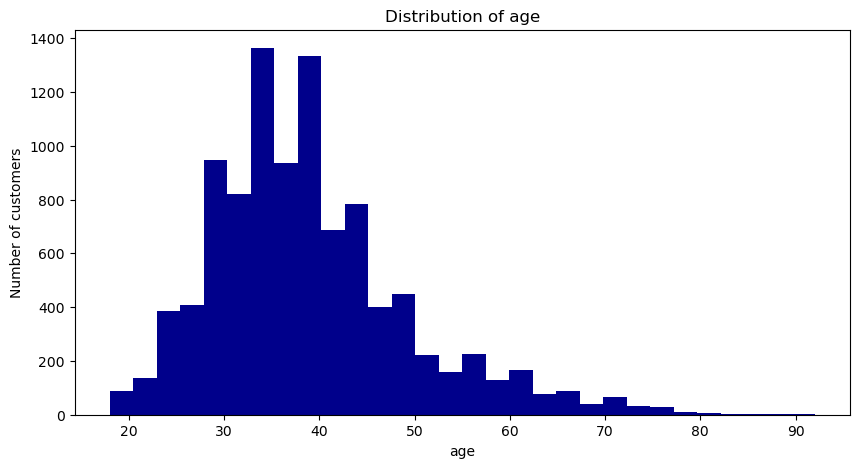

In [30]:
# Plot a histogram of the 'age' feature
plt.figure(figsize =(10,5))
plt.hist(data_churn['age'], bins=30, color='darkblue')
plt.xlabel('age')
plt.ylabel('Number of customers')
plt.title('Distribution of age')
plt.show()

In [31]:
print('Minimun Age:', data_churn['age'].min())
print('Maximum Age:', data_churn['age'].max())
print('Median Age:', data_churn['age'].median())

Minimun Age: 18
Maximum Age: 92
Median Age: 37.0


In [32]:
#Number of customers by country and Age Group:

# Create age groups (e.g., 20-30, 31-40, etc.)
age_bins = [0, 20, 30, 40, 50, 60, 70, 92]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
data_churn['Age Group'] = pd.cut(data_churn['age'], bins=age_bins, labels=age_labels)

# Aggregate number of customers by country and age group
No_of_customers_country_age = data_churn.groupby(['country', 'Age Group']).size().reset_index(name='Number of Customers')

# Sort the aggregated data by the number of customers in ascending order
No_of_customers_country_age_sorted = No_of_customers_country_age.sort_values(by='Number of Customers', ascending=False)

In [33]:
data_churn.head(4)
#data_churn[["Age Group", "age"]] [data_churn["age"]==51]
#data_churn.drop("Age Group", axis=1, inplace=True)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Age Group
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-50
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-50
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-50
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-40


### Draw bar chart for number of customers with age group based on country:

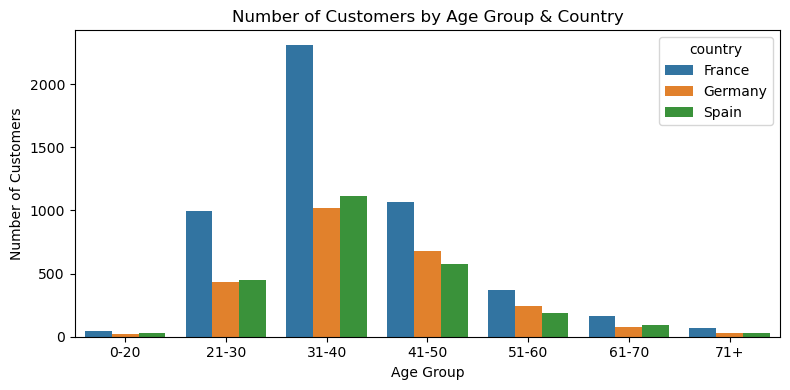

In [34]:
# Draw bar chart for number of customers with Age group based on country
plt.figure(figsize=(8,4))
sns.barplot(data=No_of_customers_country_age_sorted, x='Age Group', y='Number of Customers', hue='country')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age Group & Country')
plt.tight_layout()
plt.show()

### Draw distribution plot of age based on churn:

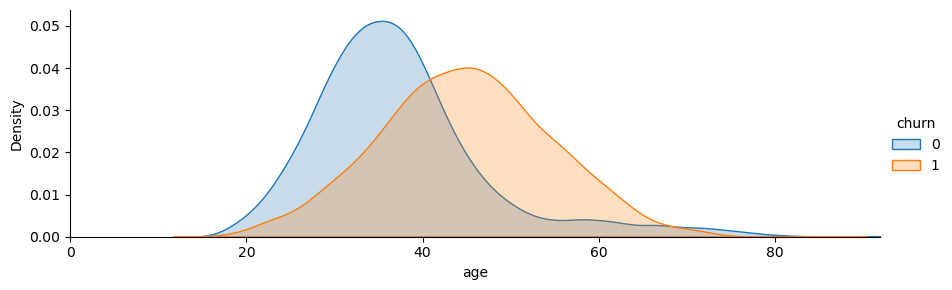

In [35]:
#distribution plot of age based on churn
facet = sns.FacetGrid(data_churn, hue="churn", aspect=3)
facet.map(sns.kdeplot, "age", shade= True)
facet.set(xlim=(0, data_churn["age"].max()))
facet.add_legend()
plt.show()

### Observation:
- In histogram, customers between age about 20 to 50 years old are the most.
    - Cause: This age group represents the working population and individuals who are likely to have banking needs such as loans, mortgages, and investments.
- The largest number of customers from all three countries are in the age group of 20 to 50 years old.
- Above distribution shows that about 30 to 70 years old customers are higher chances to churn.

### 🟣 F: Show & Find the insights of balance and estimated_salary based on churn

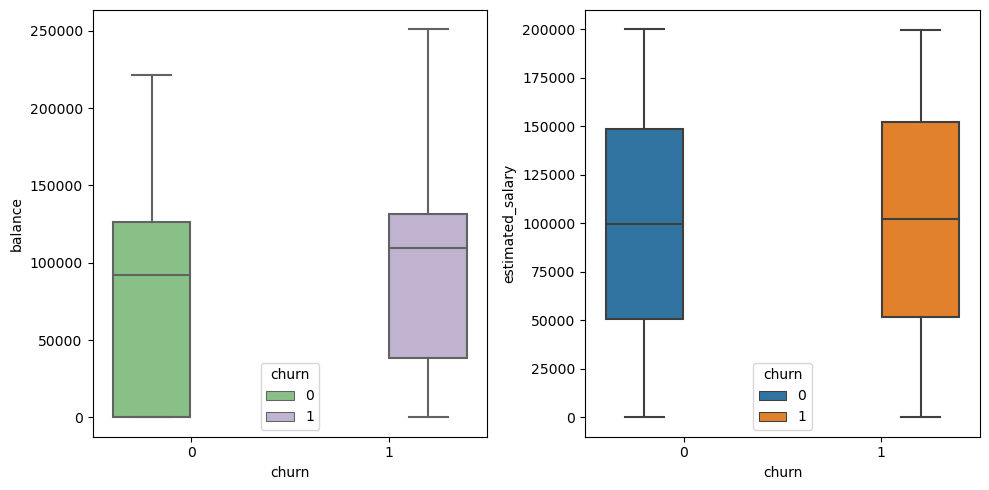

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=data_churn["balance"], x=data_churn["churn"], hue=data_churn["churn"], palette=color_1)
plt.subplot(1,2,2)
sns.boxplot(y=data_churn["estimated_salary"], x=data_churn["churn"], hue=data_churn["churn"], palette=color)
plt.tight_layout()
plt.show()

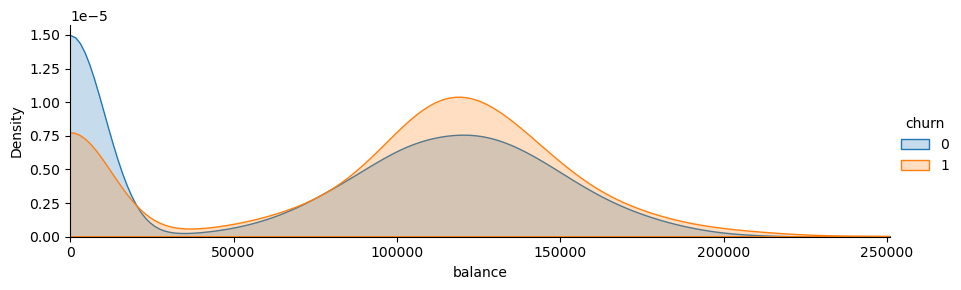

In [37]:
facet = sns.FacetGrid(data_churn, hue="churn", aspect=3)
facet.map(sns.kdeplot,"balance",shade= True)
facet.set(xlim=(0, data_churn["balance"].max()))
facet.add_legend()
plt.show()

### Observation:
- Insight of the balance column: the range of minimum balance 50000 and maximum balance of the 250000 customers are churned.
- Insight of the estimated_salary column: mostly range of 25% estimated_salary 50000 above and maximum estimated_salary of the 170000 customers are churned.

### 🟣 G: Show & Find the insights of tenure and credit_score based on churn

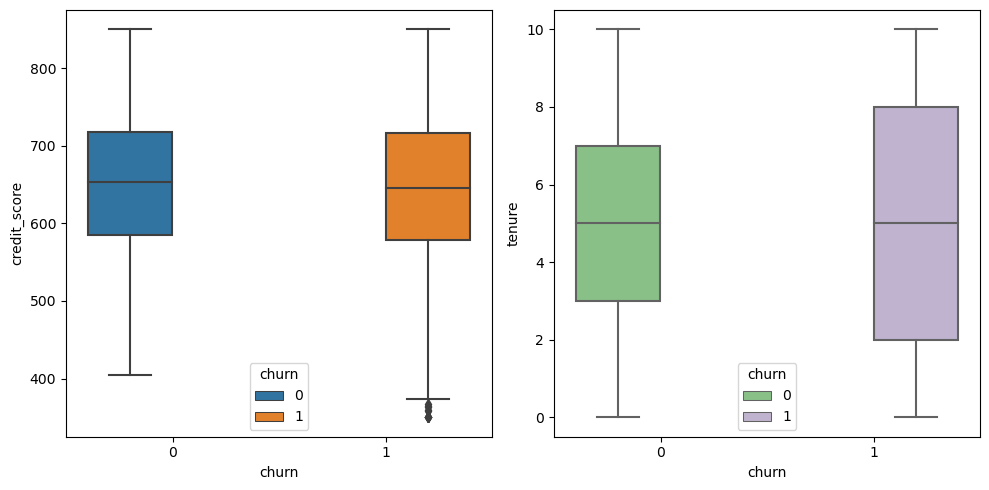

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=data_churn["credit_score"], x=data_churn["churn"], hue=data_churn["churn"], palette=color)
plt.subplot(1,2,2)
sns.boxplot(y=data_churn["tenure"], x=data_churn["churn"], hue=data_churn["churn"], palette=color_1)
plt.tight_layout()
plt.show()

Minimun credit_score: 350
Maximum credit_score: 850
Median credit_score: 652.0


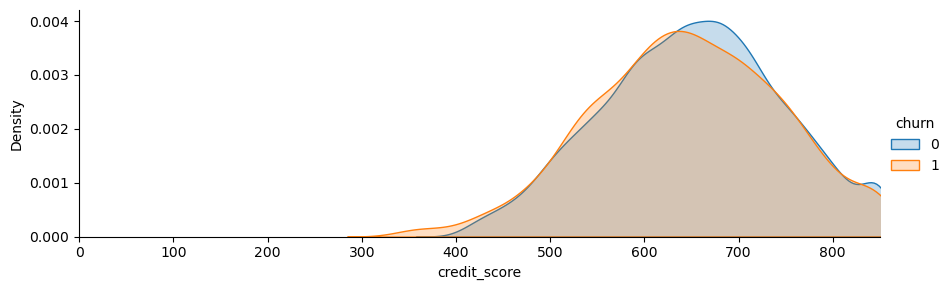

In [39]:
facet = sns.FacetGrid(data_churn, hue="churn", aspect=3)
facet.map(sns.kdeplot, "credit_score", shade= True)
facet.set(xlim=(0, data_churn["credit_score"].max()))
facet.add_legend()
#plt.show()
print('Minimun credit_score:',data_churn['credit_score'].min())
print('Maximum credit_score:',data_churn['credit_score'].max())
print('Median credit_score:',data_churn['credit_score'].median())

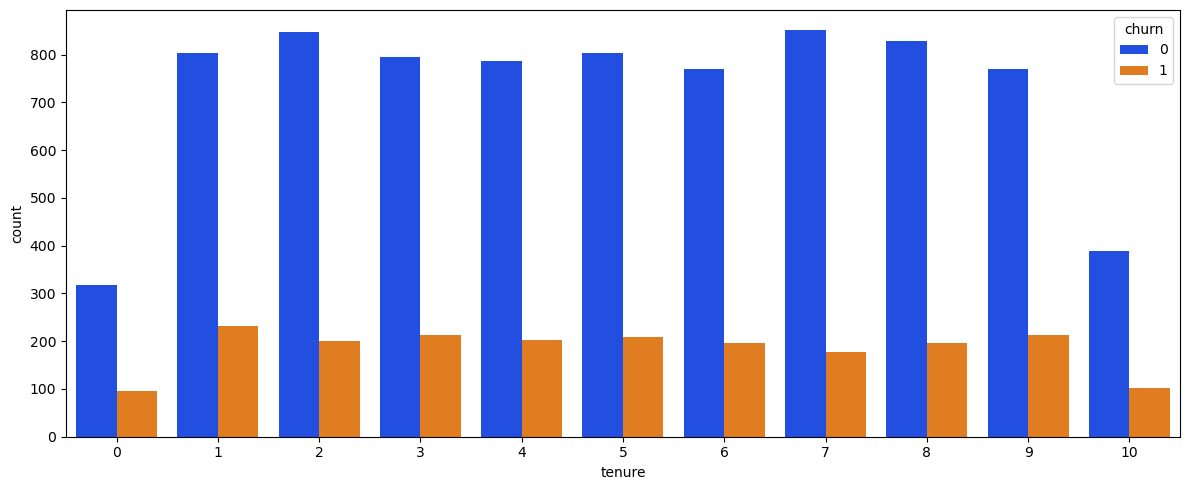

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(data=data_churn, x="tenure", hue="churn", palette="bright")
plt.tight_layout()
plt.show()

### Observation:
- Insight of the credit_score column: minimum of the 350 to max 850 credit_score customers are churned.
- Insight of the tenure column:It seems that the churn ratio is the same in all of them!

### 🟣 H: Correlation Matrix

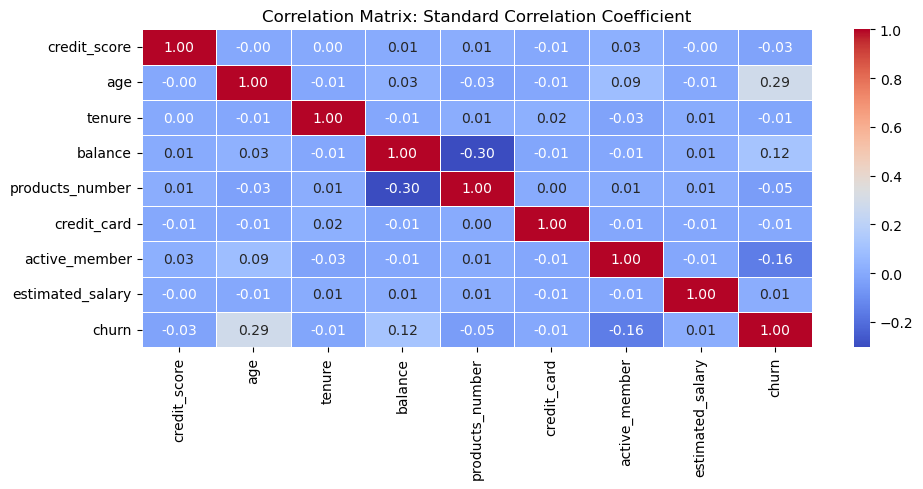

In [41]:
plt.figure(figsize=(10, 5))
sns.heatmap(data_churn.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Standard Correlation Coefficient')
plt.tight_layout()
plt.show()

### Observation: 
- **Findings:** 
    - Not a very good correlations between features.
    - The correlation analysis reveals that there is no strong linear relationship between the features examined.
- **Cause:**
    - The absence of strong correlations suggests that customer churn may be influenced by a combination of multiple factors rather than a single dominant factor.
- **Note:**
    - There are no **country** and **gender** columns in the correlation matrix because they have a categorical data type!
    - So, first we convert them to numerical data type.

# Step 6: Data Preprocessing (Part 2)

### 🟣 A: Feature Engineering

- We performed feature engineering on the age column and created a new column called age group

### 🟣 B: Convert category values to number discrete values in gender variable

In [42]:
data_churn_New = pd.DataFrame()
data_churn_New = data_churn.copy()
data_churn_New['gender'] = np.where(data_churn['gender'] == 'Male', 1, 0)

In [43]:
# Show data after convert values in gender column for example 5 records from tail
data_churn_New[-5:]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Age Group
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0,31-40
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0,31-40
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1,31-40
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,41-50
9999,792,France,0,28,4,130142.79,1,1,0,38190.78,0,21-30


**Result:**
   - We converted **gender** column values to **numeric discrete values**

### 🟣 C: One-Hot Encoding method

- **One hot encoding** is a preprocessing technique in machine learning that transforms categorical variables into numerical values, enabling algorithms to better understand and learn from categorical data.
  - **from sklearn.preprocessing import OneHotEncoder**
- **pandas.get_dummies()** is used for data manipulation. It converts categorical data into dummy or indicator variables.
** **
- In the following, we want to convert **country** values to **numeric discrete values** using the **get_dammies method**.
  - **cause: in terms of memory, get_dummies method in pandas works better than one-hot encoding method in SKlearn.**

In [44]:
#data_churn_New.drop("Age Group", axis=1 ,inplace=True)
data_dummies_churn = pd.get_dummies(data_churn_New, drop_first=True)
data_dummies_churn

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,Age Group_21-30,Age Group_31-40,Age Group_41-50,Age Group_51-60,Age Group_61-70,Age Group_71+
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0,0,0,1,0,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0,1,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,1,0,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0,0,1,0,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0,0,1,0,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0,0,1,0,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0,0,1,0,0,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0,0,0,1,0,0,0


**Result:**
   - We converted **country** and **Age Group** columns values to **numeric discrete values** using get_dummies method.

### 🟣 D: Check Correlation

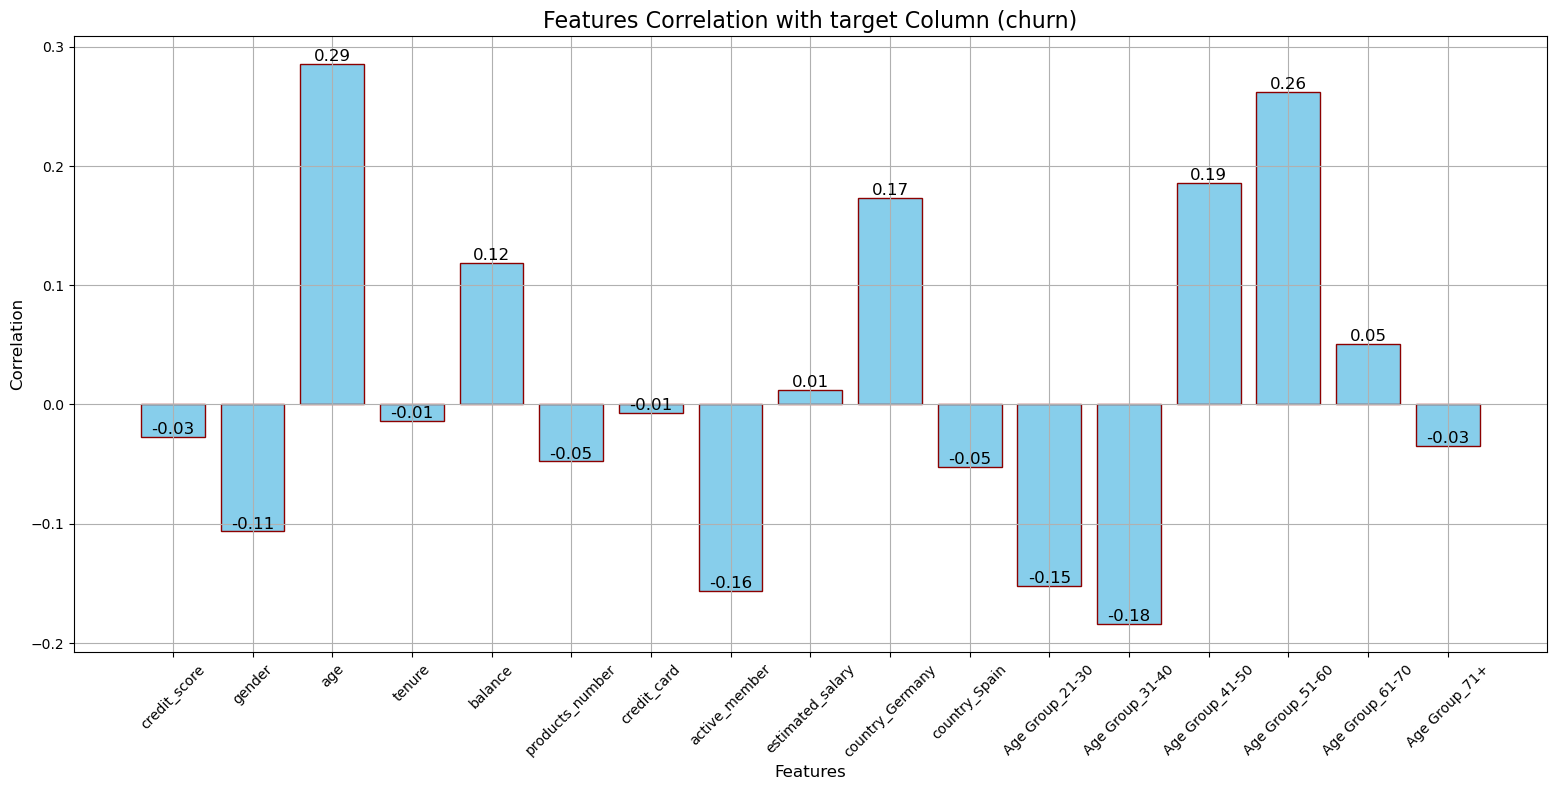

In [45]:
df = data_dummies_churn.drop(columns='churn') # witout the target column 'churn'

#Computing the correlation between the features and the target column
corrw = df.corrwith(data_dummies_churn['churn'])

#Plotting the bar chart using matplotlib
plt.figure(figsize=(19, 8))
plt.bar(corrw.index, corrw.values, color='skyblue', edgecolor='darkred')

plt.title('Features Correlation with target Column (churn)', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Adding annotations to the bars
for i, value in enumerate(corrw.values):
    label = f"{value:.2f}"
    plt.annotate(label, (i, value), ha='center', va='bottom', fontsize=12)

# Displaying the plot
plt.show()

### 🟣 E: Feature Selection

In [46]:
columns = ['age', 'Age Group_51-60', 'Age Group_41-50', 'country_Germany', 'balance','gender',
           'Age Group_21-30', 'active_member', 'Age Group_31-40', 'churn']
Feature_selected = data_dummies_churn[columns]
Feature_selected

,age,Age Group_51-60,Age Group_41-50,country_Germany,balance,gender,Age Group_21-30,active_member,Age Group_31-40,churn
0,42,0,1,0,0.00,0,0,1,0,1
1,41,0,1,0,83807.86,0,0,1,0,0
2,42,0,1,0,159660.80,0,0,0,0,1
3,39,0,0,0,0.00,0,0,0,1,0
4,43,0,1,0,125510.82,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,39,0,0,0,0.00,1,0,0,1,0
9996,35,0,0,0,57369.61,1,0,1,1,0
9997,36,0,0,0,0.00,0,0,1,1,1
9998,42,0,1,1,75075.31,1,0,0,0,1


# Step 7: Split data

 ### 🟣 A: Specify X, y

In [47]:
#Select final dataset from data_dummies_churn or Feature_selected

#data_dummies_churn dataset
X = data_dummies_churn.drop(['churn'], axis=1)
y = data_dummies_churn['churn']

#Feature_selected dataset
#X = Feature_selected.drop(['churn'], axis=1)
#y = Feature_selected['churn']

In [48]:
X.columns

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'country_Germany',
       'country_Spain', 'Age Group_21-30', 'Age Group_31-40',
       'Age Group_41-50', 'Age Group_51-60', 'Age Group_61-70',
       'Age Group_71+'],
      dtype='object')

### 🟣 B: Scale Features

In [49]:
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X))
scaled_X.columns = X.columns

### 🟣 C: train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=42)

In [51]:
X_train.shape

(7000, 17)

In [52]:
X_test.shape

(3000, 17)

In [53]:
y_train.shape

(7000,)

In [54]:
y_test.shape

(3000,)

# Step 8: Logistic Regression

### 🟣 A: Create the Model

In [55]:
model = LogisticRegression()

### 🟣 B: Train the Model

In [56]:
model.fit(X_train, y_train)

LogisticRegression()

### 🟣 C: Show coefficient

In [57]:
model.coef_

array([[-6.44245839e-02, -2.71726138e-01,  8.63644438e-01,
        -6.43914553e-02,  1.64712265e-01, -4.33545194e-02,
        -2.75775709e-02, -4.83071915e-01,  5.10762043e-04,
         3.25965079e-01,  2.32855305e-02, -1.38917600e-01,
        -2.48108161e-01,  2.55219493e-02,  6.94933871e-02,
        -2.28522776e-01, -4.68878511e-01]])

### 🟣 D: Show interception

In [58]:
model.intercept_

array([-1.69466497])

# Step 9: Prediction & Evaluation

### 🟣 A: Predicting test set

In [59]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 🟣 B: Evaluating the Model

**Confusion Matrix**

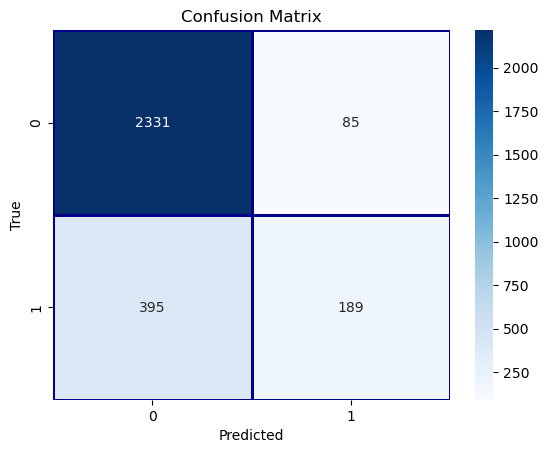

In [60]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap='Blues', fmt='.0f', robust=True, linecolor='darkblue', linewidths=1)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Results:**
- TP: 2331
- TN: 189
- FP: 85
- FN: 395

**1. Score report**

In [61]:
accuracy = (accuracy_score(y_test, y_pred)*100).round(2)
precision = (precision_score(y_test, y_pred)*100).round(2)
recall = (recall_score(y_test, y_pred)*100).round(2)
F1 = (f1_score(y_test, y_pred)*100).round(2)
 
results = pd.DataFrame([['Logistic Regression', accuracy, precision, recall, F1]],
                      columns=['Model', 'Accuracy_Score', 'Precision_Score', 'Recall_Score', 'F1_Score' ],
                      index = ['Score: '])
results

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
Score:,Logistic Regression,84.0,68.98,32.36,44.06


**2. classification report**

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2416
           1       0.69      0.32      0.44       584

    accuracy                           0.84      3000
   macro avg       0.77      0.64      0.67      3000
weighted avg       0.82      0.84      0.82      3000



**3. print log_loss**

In [63]:
log_loss(y_test, y_pred).round(4)

5.767

**Log loss** is a metric evaluating classification model performance by measuring the disparity between predicted and actual probabilities. Rooted in information theory, it penalizes deviations, offering a continuous metric for optimization during model training. Lower log loss values signify better alignment between predicted and actual outcomes, making it a valuable tool for assessing the accuracy of probability estimates in classification problems.

#### 4. Using ROC curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. The ROC curve is a graph of the specificity vs sensitivity i.e specificity is the % actual negatives correctly predicted and sensitivity being the % actual positives correctly predicted.

The ROC curve is the plot of the true positive rate (TPR) against the false positive rate (FPR) at each threshold setting.

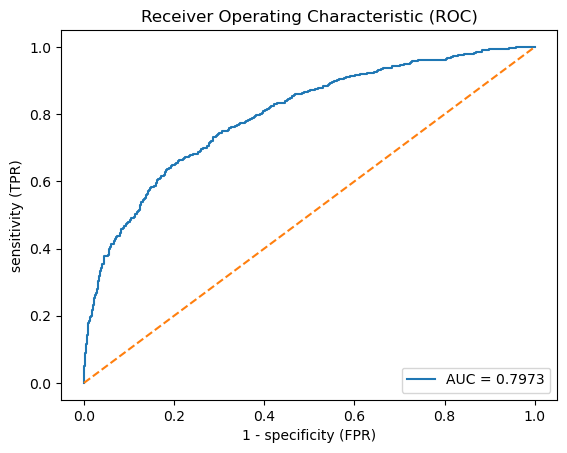

In [64]:
import sklearn.metrics as metrics

y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('1 - specificity (FPR)')
plt.ylabel('sensitivity (TPR)')
plt.show()

### Observation:

#### - Logistic Regression model is good!
#### - specially, Accuracy is 84% and  AUC is good score (79.73%) based on the figure below.

<div style="align:center;"> <img src="Images/ROC.png" width="800" height="700"/> </div>

<div class="alert alert-success" role="alert">
     <h1 class="alert-heading">Well done!</h1>
     <p> Best Wishes!, Nourzad</p>
</div>